In [1]:
#based on data from https://www.kaggle.com/datasets/sohier/crime-in-baltimore

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2

In [16]:
df=pd.read_csv('../data/BPD_Part_1_Victim_Based_Crime_Data.csv')

In [4]:
set(df['Description'])

{'AGG. ASSAULT',
 'ARSON',
 'ASSAULT BY THREAT',
 'AUTO THEFT',
 'BURGLARY',
 'COMMON ASSAULT',
 'HOMICIDE',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET',
 'SHOOTING'}

In [5]:
'''
Chatgpt:
For your analysis focusing on homicides and confidence intervals, you can explore several questions. Here are a few ideas, along with a brief explanation of how confidence intervals can be used to address each question:

    What is the average number of homicides per year in Baltimore from 2012-2017?
        You could calculate the average number of homicides each year and then construct a confidence interval around that mean. This would allow you to estimate the true average homicide rate with a certain level of confidence (e.g., 95%).

    Is there a statistically significant difference in homicide rates between different years?
        You could compute confidence intervals for the homicide rates for each year and compare them. Overlapping confidence intervals suggest that the difference may not be statistically significant, while non-overlapping intervals could indicate a significant difference.

    What is the proportion of homicides relative to other crimes?
        You could calculate the proportion of homicides among all crimes in each year or across the whole period and then construct a confidence interval for this proportion. This would help you understand the variability of the homicide rate relative to the total crime rate.

    Is there a difference in the proportion of homicides across different months?
        You could group the data by months and construct confidence intervals for the monthly homicide rates. This would allow you to assess whether some months consistently show higher or lower homicide rates, giving insight into possible seasonal trends.

    Estimate the future homicide rate based on past data (2012-2017).
        Using the past homicide data, you could estimate the expected homicide rate for future periods and construct a confidence interval around that estimate. This would provide a range for the future homicide rate based on historical data.
'''

'\nChatgpt:\nFor your analysis focusing on homicides and confidence intervals, you can explore several questions. Here are a few ideas, along with a brief explanation of how confidence intervals can be used to address each question:\n\n    What is the average number of homicides per year in Baltimore from 2012-2017?\n        You could calculate the average number of homicides each year and then construct a confidence interval around that mean. This would allow you to estimate the true average homicide rate with a certain level of confidence (e.g., 95%).\n\n    Is there a statistically significant difference in homicide rates between different years?\n        You could compute confidence intervals for the homicide rates for each year and compare them. Overlapping confidence intervals suggest that the difference may not be statistically significant, while non-overlapping intervals could indicate a significant difference.\n\n    What is the proportion of homicides relative to other crimes

/tmp/ipykernel_912955/2526144904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides_df['CrimeDate'] = pd.to_datetime(homicides_df['CrimeDate'])
/tmp/ipykernel_912955/2526144904.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides_df['Year'] = homicides_df['CrimeDate'].dt.year


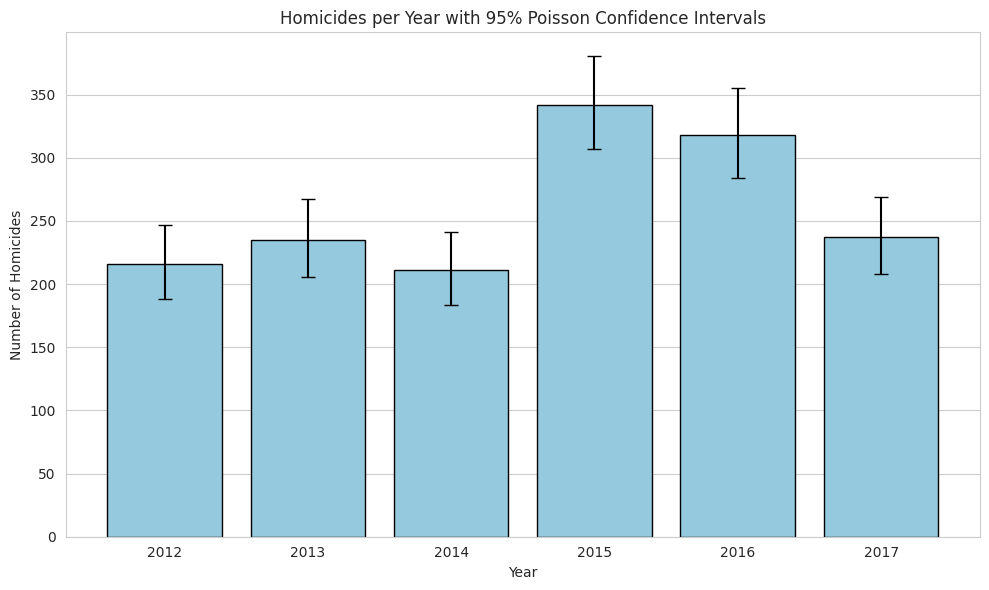

In [25]:
# Filter the data to only include homicides
# Load the dataset
df = pd.read_csv('../data/BPD_Part_1_Victim_Based_Crime_Data.csv')

# Filter the data to only include homicides
homicides_df = df[df['Description'] == 'HOMICIDE']

# Convert the CrimeDate column to datetime
homicides_df['CrimeDate'] = pd.to_datetime(homicides_df['CrimeDate'])

# Extract the year from the CrimeDate column
homicides_df['Year'] = homicides_df['CrimeDate'].dt.year

# Filter data for the years 2012-2017
homicides_df = homicides_df[(homicides_df['Year'] >= 2012) & (homicides_df['Year'] <= 2017)]

# Count the number of homicides for each year
homicides_per_year = homicides_df['Year'].value_counts().sort_index()

# Prepare data for calculations
years = homicides_per_year.index.astype(int)
counts = homicides_per_year.values

# Significance level
alpha = 0.05

# Calculate exact Poisson confidence intervals
lower_bounds = []
upper_bounds = []

for x in counts:
    # Lower bound
    if x == 0:
        lower = 0
    else:
        lower = 0.5 * chi2.ppf(alpha / 2, 2 * x)
    # Upper bound
    upper = 0.5 * chi2.ppf(1 - alpha / 2, 2 * (x + 1))
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Create a DataFrame with the results
ci_df = pd.DataFrame({
    'Year': years,
    'Homicides': counts,
    'Lower_CI': lower_bounds,
    'Upper_CI': upper_bounds
})

# Set the style for seaborn
sns.set_style('whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the bar chart
sns.barplot(x='Year', y='Homicides', data=ci_df, color='skyblue', edgecolor='black')

# Add error bars
plt.errorbar(
    x=np.arange(len(ci_df)),
    y=ci_df['Homicides'],
    yerr=[ci_df['Homicides'] - ci_df['Lower_CI'], ci_df['Upper_CI'] - ci_df['Homicides']],
    fmt='none', c='black', capsize=5
)

# Customize the plot
plt.title('Homicides per Year with 95% Poisson Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.xticks(ticks=np.arange(len(ci_df)), labels=ci_df['Year'])
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
import pandas as pd
import numpy as np

# Assume 'df' is your original DataFrame
# Filter the data to only include homicides
homicides_df = df[df['Description'] == 'HOMICIDE'].copy()

# Convert 'CrimeDate' to datetime
homicides_df['CrimeDate'] = pd.to_datetime(homicides_df['CrimeDate'])

# Combine 'CrimeDate' and 'CrimeTime' into 'CrimeDateTime'
homicides_df['CrimeDateTime'] = pd.to_datetime(
    homicides_df['CrimeDate'].dt.strftime('%Y-%m-%d') + ' ' + homicides_df['CrimeTime'],
    errors='coerce'
)

# Remove rows with invalid 'CrimeDateTime'
homicides_df = homicides_df.dropna(subset=['CrimeDateTime']).reset_index(drop=True)

# Sort the DataFrame by 'CrimeDateTime'
homicides_df = homicides_df.sort_values('CrimeDateTime').reset_index(drop=True)

# Calculate the time differences
homicides_df['TimeDifference'] = homicides_df['CrimeDateTime'].diff()

# Remove the first row since it will have a NaT value for the time difference
homicides_df = homicides_df.dropna(subset=['TimeDifference']).reset_index(drop=True)

# Convert time differences to total seconds
homicides_df['TimeDifferenceSeconds'] = homicides_df['TimeDifference'].dt.total_seconds()

# Create a NumPy array of time intervals
time_intervals = homicides_df['TimeDifferenceSeconds'].values

time_intervals/60/60


array([19.6       , 35.38333333, 33.88333333, ...,  2.13333333,
       68.35      ,  3.11666667])

(array([324., 155., 142., 140., 160., 104.,  83.,  47.,  69.,  52.,  31.,
         27.,  26.,  31.,  28.,  17.,  13.,  16.,  15.,   9.,   4.,   6.,
          9.,   6.,   5.,   3.,   9.,   3.,   2.,   1.,   4.,   4.,   2.,
          0.,   2.,   3.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.]),
 array([  0.  ,   5.32,  10.64,  15.96,  21.28,  26.6 ,  31.92,  37.24,
         42.56,  47.88,  53.2 ,  58.52,  63.84,  69.16,  74.48,  79.8 ,
         85.12,  90.44,  95.76, 101.08, 106.4 , 111.72, 117.04, 122.36,
        127.68, 133.  , 138.32, 143.64, 148.96, 154.28, 159.6 , 164.92,
        170.24, 175.56, 180.88, 186.2 , 191.52, 196.84, 202.16, 207.48,
        212.8 , 218.12, 223.44, 228.76, 234.08, 239.4 , 244.72, 250.04,
        255.36, 260.68, 266.  ]),
 <BarContainer object of 50 artists>)

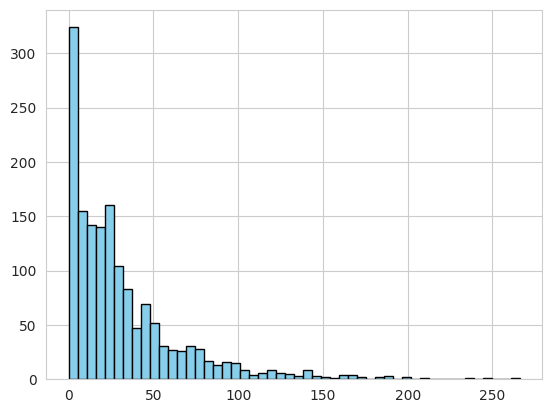

In [37]:
plt.hist(time_intervals/60/60, bins=50, color='skyblue', edgecolor='black')